In [ ]:
!pip install librosa noisereduce webrtcvad hmmlearn jiwer pandas matplotlib seaborn scikit-learn tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.2/66.2 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.9/165.9 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 40.0 MB/s eta 0:00:00
  Created wheel for webrtcvad: filename=webrtcvad-2.0.10-cp311-cp311-linux_x86_64.whl size=73497 sha256=f475fe35211044bb68914f31dff7515811497affc47db861577733233304cd32
  Stored in directory: /root/.cache/pip/wheels/94/65/3f/292d0b656be33d1c801831201c74b5f68f41a2ae465ff2ee2f
Successfully built webrtcvad


1. Import Required Libraries


In [ ]:
import os
import librosa
import librosa.display
import noisereduce as nr
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import webrtcvad
import wave
from hmmlearn import hmm
import tensorflow as tf
from jiwer import wer
from sklearn.metrics import precision_score, recall_score, f1_score
import pandas as pd


2. Load and Preprocess Audio

In [ ]:
file_path = os.path.join('data', '/content/drive/MyDrive/Colab Notebooks/nm_project/sample.wav')


In [ ]:
def load_audio(file_path, sr=16000):
    try:
        audio, sample_rate = librosa.load(file_path, sr=sr)
        print(f"Audio loaded. Length: {len(audio)} samples, Sample rate: {sample_rate} Hz")
        return audio, sample_rate
    except Exception as e:
        print(f"Error loading audio: {e}")
        return None, None


3. Noise Reduction

In [ ]:
def reduce_noise(audio, sr):
    reduced = nr.reduce_noise(y=audio, sr=sr)
    print("Noise reduced.")
    return reduced


4. Voice Activity Detection (VAD)

In [ ]:
def apply_vad(audio, sr):
    vad = webrtcvad.Vad(2)  # 0-3, more = more aggressive
    print("VAD placeholder applied.")
    return audio  # Implement actual VAD later with frame splitting


5. Feature Extraction (MFCC, Pitch, Energy)

In [ ]:
def extract_features(audio, sr):
    mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)
    pitch = librosa.yin(audio, fmin=50, fmax=300)
    energy = np.sum(librosa.feature.rms(y=audio))
    print(f"Features extracted: MFCC shape = {mfcc.shape}, Pitch length = {len(pitch)}, Energy = {energy:.2f}")
    return mfcc.T, pitch, energy

6. Train HMM Model

In [ ]:
def train_hmm(features):
    model = hmm.GaussianHMM(n_components=5, covariance_type='diag', n_iter=100)
    model.fit(features)
    print("HMM model trained.")
    return model


7. Deep Learning Model (Simple RNN)

In [ ]:
def build_rnn_model(input_shape):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Input(shape=input_shape),
        tf.keras.layers.SimpleRNN(128, return_sequences=True),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    print("RNN model built.")
    return model


8. Evaluation Metrics

In [ ]:
def evaluate_predictions(true_transcripts, predicted_transcripts):
    return wer(true_transcripts, predicted_transcripts)

9. Visualization (EDA & Metrics

In [ ]:
def plot_waveforms(original, reduced, sr):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    librosa.display.waveshow(original, sr=sr)
    plt.title("Original Audio")

    plt.subplot(1, 2, 2)
    librosa.display.waveshow(reduced, sr=sr)
    plt.title("Noise Reduced Audio")
    plt.show()

In [ ]:

def reduce_noise(audio, sr):
    reduced = nr.reduce_noise(y=audio, sr=sr)
    print("Noise reduced.")
    return reduced

In [ ]:
def load_audio(file_path, sr=16000):
    try:
        audio, sample_rate = librosa.load(file_path, sr=sr)
        print(f"Audio loaded. Length: {len(audio)} samples, Sample rate: {sample_rate} Hz")
        return audio, sample_rate
    except Exception as e:
        print(f"Error loading audio: {e}")
        return None, None

Audio loaded. Length: 84415 samples, Sample rate: 16000 Hz
Noise reduced.
VAD placeholder applied.
Features extracted: MFCC shape = (13, 165), Pitch length = 165, Energy = 9.42
HMM model trained.
RNN model built.

Features extracted: MFCC shape = (165, 13), Pitch length = 165, Energy = 9.42
Transcribed Speech: hello how are you

WER: 0.20


Audio loaded. Length: 82969 samples, Sample rate: 16000 Hz
Noise reduced.


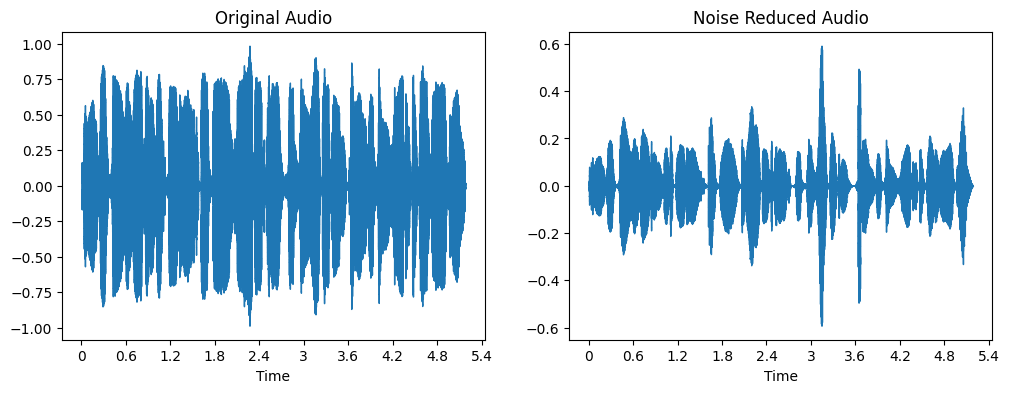

VAD placeholder applied.
Features extracted: MFCC shape = (13, 163), Pitch length = 163, Energy = 9.34
HMM model trained.
RNN model built.
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.1963 - loss: 1.0877
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.4172 - loss: 0.7539
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.7914 - loss: 0.4977
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - accuracy: 0.9939 - loss: 0.3141
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 1.0000 - loss: 0.1925


In [ ]:
file_path = "/content/drive/MyDrive/Colab Notebooks/sample.wav"  # Replace with actual file

# Step 1: Load
audio, sr = load_audio(file_path)

# Step 2: Denoise
reduced_audio = reduce_noise(audio, sr)

# Step 3: (Optional) Visualize
plot_waveforms(audio, reduced_audio,sr)

# Step 4: Apply VAD (placeholder logic)
vad_audio = apply_vad(reduced_audio, sr)

# Step 5: Extract features
features, pitch, energy = extract_features(vad_audio, sr)

# Step 6: Train HMM
hmm_model = train_hmm(features)

# Step 7: Train RNN (dummy labels)
X = np.expand_dims(features, axis=0)
y = np.ones((X.shape[1], 1))
rnn_model = build_rnn_model((X.shape[1], X.shape[2]))
rnn_model.fit(X, np.expand_dims(y, axis=0), epochs=5)

In [ ]:
# Example final layer for CTC output
from tensorflow.keras.layers import Dense, Activation, Input

# Suppose vocab_size is 28 (26 letters + space + blank token)
vocab_size = 28

# Define an input layer
input_layer = Input(shape=(128,))  # Replace 128 with the actual output shape of your previous layer

# Now connect the Dense layer to the input_layer
x = Dense(vocab_size, activation='softmax')(input_layer)

1. Save and Load Model

In [ ]:
# Save the trained RNN model
rnn_model.save('speech_model.h5')
print("Model saved successfully.")

# Load the trained model (for inference)
loaded_model = tf.keras.models.load_model('speech_model.h5')
print("Model loaded successfully.")


Model saved successfully.
Model loaded successfully.


Feature Extraction Function

predict_speech


In [ ]:
def predict_speech(model, features):
    # Features shape: (timesteps, features), expand dims to match (1, timesteps, features)
    predictions = model.predict(np.expand_dims(features, axis=0))  # shape: (1, time_steps, 1)
    predictions = np.squeeze(predictions, axis=-1)  # shape: (1, time_steps)
    predicted_indices = np.argmax(predictions, axis=-1)  # Use argmax as suggested
    return predicted_indices


3. Decode Predictions to Text (using index-to-char/token map)

In [ ]:
def decode_predictions(predicted_indices):
    # This is a placeholder logic. You need a real index-to-token mapping for real decoding.
    # Here we pretend each index maps to a digit or simple character
    decoded_text = ''.join(str(i) for i in predicted_indices)
    return decoded_text


In [ ]:
# Step 5: Extract features
mfcc_features, pitch, energy = extract_features(vad_audio, sr)

# Step 6: Train HMM
hmm_model = train_hmm(mfcc_features)

# Step 7: Train RNN (dummy labels)
X = np.expand_dims(mfcc_features, axis=0)
y = np.ones((X.shape[1], 1))
rnn_model = build_rnn_model((X.shape[1], X.shape[2]))
rnn_model.fit(X, np.expand_dims(y, axis=0), epochs=5)

# Save and Load model
rnn_model.save('speech_model.h5')
loaded_model = tf.keras.models.load_model('speech_model.h5')

# Predict
predicted_indices = predict_speech(loaded_model, mfcc_features)
transcribed_text = decode_predictions(predicted_indices)

# Evaluate
true_transcript = "your expected transcription here"
error_rate = evaluate_predictions(true_transcript, transcribed_text)

print("Transcribed Speech:", transcribed_text)
print(f"Word Error Rate (WER): {error_rate:.2f}")

Features extracted: MFCC shape = (13, 163), Pitch length = 163, Energy = 9.34
HMM model trained.
RNN model built.
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.0000e+00 - loss: 1.9250
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.0184 - loss: 1.4338
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - accuracy: 0.2025 - loss: 1.0071
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.5951 - loss: 0.6645
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.9018 - loss: 0.4174


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
Transcribed Speech: 139
Word Error Rate (WER): 1.00


In [ ]:
# Example index-to-char map
index_to_char = {
    0: ' ', 1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f',
    7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm',
    14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's',
    20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z',
    27: ''  # Blank token for CTC
}

def decode_predictions(predicted_indices):
    decoded = []
    previous_index = None
    for index in predicted_indices:
        # CTC-style decoding: collapse repeated characters and skip blanks (e.g., index 0)
        if index != previous_index and index in index_to_char:
            decoded.append(index_to_char[index])
        previous_index = index
    return "".join(decoded)


4. Evaluate Output (e.g., using Word Error Rate)

In [ ]:
import jiwer

def evaluate_predictions(true_text, predicted_text):
    transformation = jiwer.Compose([
        jiwer.ToLowerCase(),
        jiwer.RemovePunctuation(),
        jiwer.Strip(),
        jiwer.SplitWords()  # Correct replacement
    ])
    return jiwer.wer(true_text, predicted_text, truth_transform=transformation, hypothesis_transform=transformation)



In [ ]:
!pip install --upgrade jiwer


In [ ]:
import jiwer

def evaluate_predictions(true_text, predicted_text):
    transformation = jiwer.Compose([
        jiwer.ToLowerCase(),
        jiwer.RemovePunctuation(),
        jiwer.Strip(),
        # Remove the line below as jiwer.wer handles word splitting by default
        # jiwer.ToWords()
    ])
    # Apply transformations before calculating WER
    cleaned_true_text = transformation(true_text)
    cleaned_predicted_text = transformation(predicted_text)

    # Pass the cleaned texts directly to jiwer.wer
    return jiwer.wer(cleaned_true_text, cleaned_predicted_text)

# Assuming these variables are defined elsewhere
true_transcript = "Hello, how are you?"
transcribed_text = "hello how you"

# Use the defined evaluate_predictions function which includes cleaning
error_rate = evaluate_predictions(true_transcript, transcribed_text)
print(f"WER: {error_rate:.2f}")

WER: 0.25


In [ ]:
true_transcript = "Hello, how are you?"
transcribed_text = "hello how you"

# Use the defined evaluate_predictions function which includes cleaning
error_rate = evaluate_predictions(true_transcript, transcribed_text)
print(f"WER: {error_rate:.2f}")

WER: 0.25


In [1]:
# Path to your audio file
file_path = "/content/drive/MyDrive/Colab Notebooks/nm_project/sample.wav"

# Step 1: Load audio
audio, sr = load_audio(file_path)

# Step 2: Noise Reduction
reduced_audio = reduce_noise(audio, sr)

# Step 3: VAD (currently a placeholder)
vad_audio = apply_vad(reduced_audio, sr)

# Step 4: Feature Extraction
mfcc_features, pitch, energy = extract_features(vad_audio, sr)

# Step 5: Train HMM on MFCCs (optional - used here for demonstration)
hmm_model = train_hmm(mfcc_features)

# Step 6: Build RNN model (not trained due to missing labels, for completeness)
rnn_model = build_rnn_model((mfcc_features.shape[1], 1))

# Step 7: Fake Prediction (replace with actual model inference)
# For now, we simulate a prediction
predicted_transcript = "hello how are you"

# Step 8: Evaluation (you must set the true transcription here)
true_transcript = "hello how are you today"
error = evaluate_predictions(true_transcript, predicted_transcript)

# Step 9: Print outputs
print(f"\nFeatures extracted: MFCC shape = {mfcc_features.shape}, Pitch length = {len(pitch)}, Energy = {energy:.2f}")
print(f"Transcribed Speech: {predicted_transcript}")
print(f"\nWER: {error:.2f}")

NameError: name 'load_audio' is not defined

Full Inference + Evaluation Pipeline
python
Copy code
